In [25]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from scipy import stats
from scipy.stats import kurtosis
import math
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot



### 01 - Problem (case study)

    Data Description.
    Goal.


######  
The objective of this data is to understand customer demographics and buying behavior. Later during the week, we will use predictive analytics to analyze the most profitable customers and how they interact. After that, we will take targeted actions to increase profitable customer response, retention, and growth.

### 02 - Getting Data

    Read the .csv file.


In [3]:
data = pd.read_csv('marketing_customer_analysis.csv')

### 03 - Cleaning/Wrangling/EDA

    Change headers names.
    Deal with NaN values.
    Categorical Features.
    Numerical Features.
    Exploration.


In [4]:
# Display first rows of datagram to get a feeling for the data.
# Display column names
display(data.head())
print("data.shape",data.shape)
print(data.columns)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


data.shape (9134, 24)
Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')


In [5]:
# to see which columns are numerical and which categorical
data = data.rename(columns={'EmploymentStatus':'Employment Status'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
Employment Status                9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [6]:
# Checking for empty columns and rows


data_nna_c= data.dropna(axis=0,how='all') # drops empty rows
data_nna = data_nna_c.dropna(axis=1,how='any') # drops empty columns - if any element in the column is empty

display(data_nna.isna().sum())
# filling in the 0 fields with the average of the column
data_nna=data_nna.mask(data_nna==0).fillna(data_nna.mean())

print("Shape before dropping empty columns or rows:",data.shape)
print("Shape after dropping testing empty columns:",data_nna_c.shape)
print("Shape after dropping data_nna empty rows:",data_nna.shape)
print("")
print("According to these results, there are no fully empty rows or columns but we do have some fields with zeros (null) so the shapes are the same")

display(data_nna.head())

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
Employment Status                0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

Shape before dropping empty columns or rows: (9134, 24)
Shape after dropping testing empty columns: (9134, 24)
Shape after dropping data_nna empty rows: (9134, 24)

According to these results, there are no fully empty rows or columns but we do have some fields with zeros (null) so the shapes are the same


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274.000000,...,5.0,0.384388,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,37657.380009,...,42.0,0.384388,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767.000000,...,38.0,0.384388,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,37657.380009,...,65.0,0.384388,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836.000000,...,44.0,0.384388,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
# Separating numerical and categorical columns

data_nna.columns

data_nna_cat = data_nna[['Customer', 'State', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'Employment Status', 'Gender',
        'Location Code', 'Marital Status', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size']].copy()
 
data_nna_num = data_nna[['Customer Lifetime Value','Income','Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']].copy()
        

['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']
column >> Customer Lifetime Value


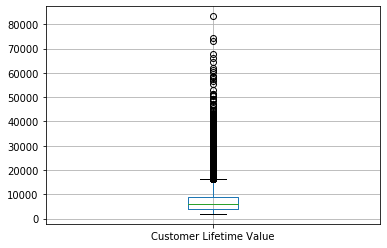

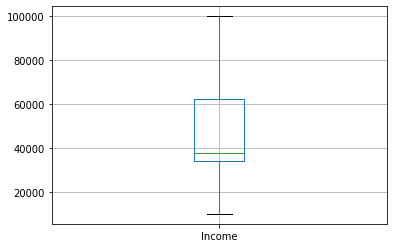

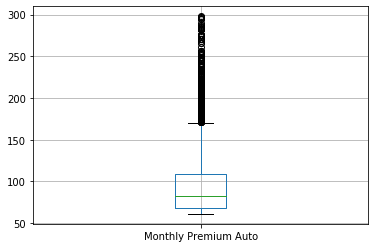

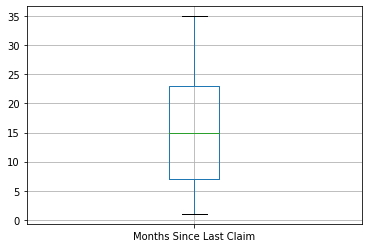

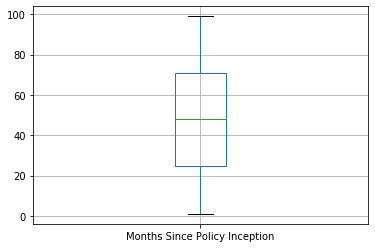

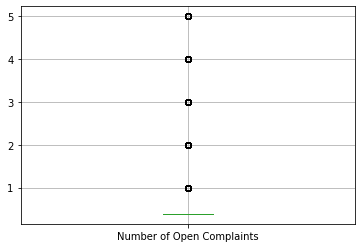

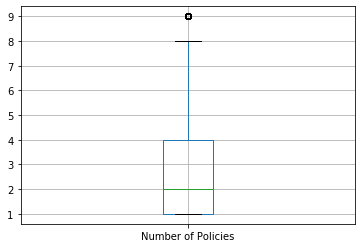

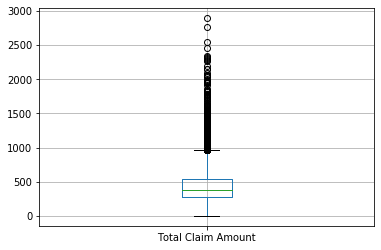

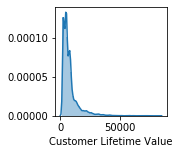

column >> Income


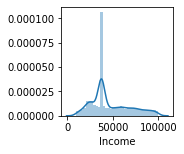

column >> Monthly Premium Auto


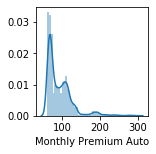

column >> Months Since Last Claim


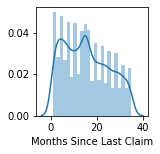

column >> Months Since Policy Inception


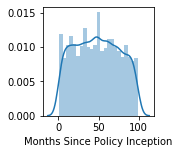

column >> Number of Open Complaints


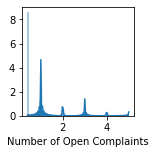

column >> Number of Policies


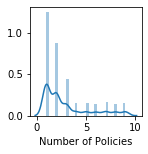

column >> Total Claim Amount


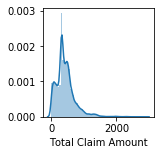

In [8]:
cols = list(data_nna_num.columns)
print(cols)

for col in cols:
    plt.figure()
    data_nna_num.boxplot([col])
    
for col in cols:
    print("column >>",col)
    fig,ax = plt.subplots(figsize=(2,2))
    ax= sns.distplot(data_nna_num[col])
    plt.show()


In [9]:
# Calculation of VIF using Statsmodels 
# We remove the dependent variable, the one we want to predict

data_nna_num.drop("Total Claim Amount", axis = 1,inplace = True)

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = data_nna_num.columns.copy() 

# calculating VIF for the independent features
vif_data["VIF"] = [variance_inflation_factor(data_nna_num.values, i) for i in (range(len(data_nna_num.columns)))] 

display(vif_data)
# creating dummies for gender 


,feature,VIF
0,Customer Lifetime Value,2.804247
1,Income,4.397889
2,Monthly Premium Auto,7.060730
3,Months Since Last Claim,3.127941
4,Months Since Policy Inception,3.520314
5,Number of Open Complaints,1.708931
6,Number of Policies,2.349440


In [10]:
# We see that Monthly premium auto has a high multicolinearity. 

#Now looking at the correlation matrix between the different variables
display(data_nna_num.corr()) # by defulat is the Pearson correlation standard for linear regression, we can also use Spearman or Kendall
#display(data_nna_num.corr("spearman"))

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
Customer Lifetime Value,1.000000,0.010481,0.396262,0.017931,0.007926,-0.039033,0.021955
Income,0.010481,1.000000,-0.013668,-0.030490,0.010211,0.013335,-0.003896
Monthly Premium Auto,0.396262,-0.013668,1.000000,0.007468,0.020276,-0.013876,-0.011233
Months Since Last Claim,0.017931,-0.030490,0.007468,1.000000,-0.037378,0.004364,0.009569
Months Since Policy Inception,0.007926,0.010211,0.020276,-0.037378,1.000000,-0.000045,-0.010014
Number of Open Complaints,-0.039033,0.013335,-0.013876,0.004364,-0.000045,1.000000,0.001787
Number of Policies,0.021955,-0.003896,-0.011233,0.009569,-0.010014,0.001787,1.000000


#### We see there is a strong correlation between customer lifetime value and monthly premium, which makes sense since the CLV is strongly influenced through the premiums customers pay.
#### On the other hand, we see that there is no strong correlation between MPA and the other columns. CLV and MPA are going to provide more or less the same information to the model, therefore, I have decided to drop CLV.

In [11]:
data_nna_num.drop("Customer Lifetime Value", axis = 1,inplace = True)

data_nna_num.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,56274.000000,69,32.0,5.0,0.384388,1
1,37657.380009,94,13.0,42.0,0.384388,8
2,48767.000000,108,18.0,38.0,0.384388,2
3,37657.380009,106,18.0,65.0,0.384388,7
4,43836.000000,73,12.0,44.0,0.384388,1


### 04 - Processing Data

    Dealing with outliers.
    Normalization.
    Encoding Categorical Data.
    Splitting into train set and test set.


In [12]:
# Computing IQR
#Q1 = df['nb'].quantile(0.25)
#Q3 = df['nb'].quantile(0.75)
#IQR = Q3 - Q1

#data_nna_num=data_nna_num.isna()

cols = list(data_nna_num.columns)
print(cols)


data_nna_num_no = data_nna_num.copy()
display(data_nna_num_no.head())
#display(data_nna_num_no)
#print("data_nna_num.count: ",data_nna_num.count)
data_nna_num_ind2 = list()
Q1 = 0.0
Q2 = 0.0

for col in cols:
    Q1 = data_nna[col].quantile(0.25)
    Q3 = data_nna[col].quantile(0.75)
    IQR = Q3 - Q1
    print("Column: ",col)
    print("Q1:",Q1)
    print("Q3:",Q3)
    Max = Q3+1.5*(Q3-Q1)
    Min = Q1-1.5*(Q3-Q1)
    print("Max:",Max)
    print("Min:",Min)
    data_nna_num_ind2 = list(data_nna_num[(data_nna_num[col]<Min)|(data_nna_num[col]>Max)].index)
    print("Number of outliers:",len(data_nna_num_ind2))

data_nna_num_no.drop(index= data_nna_num_ind2, axis=0, inplace=True)
# we need to drop also those rows for the categorical data!!! Otherwise, the rows will not match and we will get NaNs at the end
data_nna_cat.drop(index= data_nna_num_ind2, axis=0, inplace=True)

data_nna_dn = pd.DataFrame()
data_nna_dn["Total Claim Amount"]=data_nna["Total Claim Amount"].drop(index= data_nna_num_ind2, axis=0)

display(data_nna_dn)


['Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies']


,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,56274.000000,69,32.0,5.0,0.384388,1
1,37657.380009,94,13.0,42.0,0.384388,8
2,48767.000000,108,18.0,38.0,0.384388,2
3,37657.380009,106,18.0,65.0,0.384388,7
4,43836.000000,73,12.0,44.0,0.384388,1


Column:  Income
Q1: 34337.0
Q3: 62320.0
Max: 104294.5
Min: -7637.5
Number of outliers: 0
Column:  Monthly Premium Auto
Q1: 68.0
Q3: 109.0
Max: 170.5
Min: 6.5
Number of outliers: 430
Column:  Months Since Last Claim
Q1: 7.0
Q3: 23.0
Max: 47.0
Min: -17.0
Number of outliers: 0
Column:  Months Since Policy Inception
Q1: 25.0
Q3: 71.0
Max: 140.0
Min: -44.0
Number of outliers: 0
Column:  Number of Open Complaints
Q1: 0.38438800087584846
Q3: 0.38438800087584846
Max: 0.38438800087584846
Min: 0.38438800087584846
Number of outliers: 1882
Column:  Number of Policies
Q1: 1.0
Q3: 4.0
Max: 8.5
Min: -3.5
Number of outliers: 416


,Total Claim Amount
0,384.811147
1,1131.464935
2,566.472247
3,529.881344
4,138.130879
...,...
9129,198.234764
9130,379.200000
9131,790.784983
9132,691.200000


Income                           0.695397
Monthly Premium Auto             2.112287
Months Since Last Claim          0.287120
Months Since Policy Inception    0.036682
Number of Open Complaints        3.198717
Number of Policies               1.301742
dtype: float64

Q-Q plot for variable:  Income


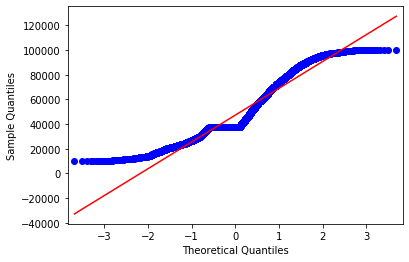

Q-Q plot for variable:  Monthly Premium Auto


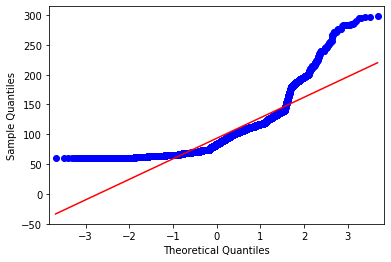

Q-Q plot for variable:  Months Since Last Claim


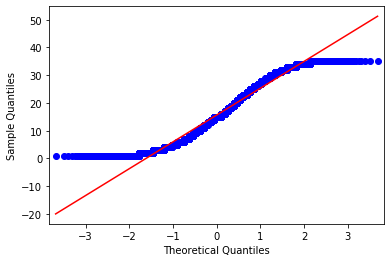

Q-Q plot for variable:  Months Since Policy Inception


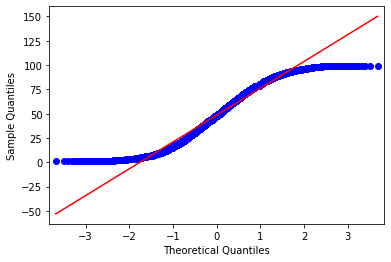

Q-Q plot for variable:  Number of Open Complaints


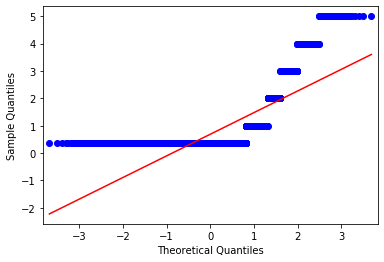

Q-Q plot for variable:  Number of Policies


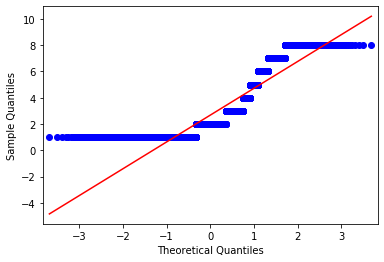

array([-0.44363324,  6.09894343, -1.00914583, -1.12533363, 10.44405875,
        0.59552498])

In [13]:
# Normality tests
# Checking for skewness and spikeness of numerical data
display(data_nna_num_no.apply(skew))
# Q-Q Plot
cols = list(data_nna_num_no.columns)
for col in cols:
    print("Q-Q plot for variable: ",col)
    qqplot(data_nna_num_no[col], line='s')
    pyplot.show()
    
#Kurtosis
kurtosis(data_nna_num_no)

Income                           99981.0
Monthly Premium Auto               298.0
Months Since Last Claim             35.0
Months Since Policy Inception       99.0
Number of Open Complaints            5.0
Number of Policies                   8.0
dtype: float64

Income                           10037.000000
Monthly Premium Auto                61.000000
Months Since Last Claim              1.000000
Months Since Policy Inception        1.000000
Number of Open Complaints            0.384388
Number of Policies                   1.000000
dtype: float64

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.514064,0.033755,0.911765,0.040816,0.000000,0.000000
1,0.307084,0.139241,0.352941,0.418367,0.000000,1.000000
2,0.430601,0.198312,0.500000,0.377551,0.000000,0.142857
3,0.307084,0.189873,0.500000,0.653061,0.000000,0.857143
4,0.375778,0.050633,0.323529,0.438776,0.000000,0.000000
...,...,...,...,...,...,...
8713,0.688250,0.050633,0.500000,0.897959,0.000000,0.142857
8714,0.128602,0.075949,0.382353,0.275510,0.000000,0.000000
8715,0.307084,0.101266,0.235294,0.367347,0.566688,0.142857
8716,0.132349,0.147679,0.970588,0.020408,0.000000,0.285714


Income                           1.0
Monthly Premium Auto             1.0
Months Since Last Claim          1.0
Months Since Policy Inception    1.0
Number of Open Complaints        1.0
Number of Policies               1.0
dtype: float64

Income                           0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
dtype: float64

Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
dtype: int64

column >> Income


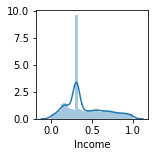

column >> Monthly Premium Auto


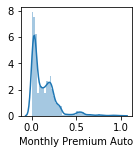

column >> Months Since Last Claim


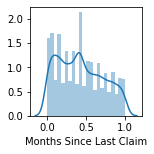

column >> Months Since Policy Inception


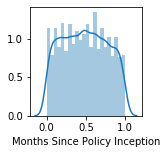

column >> Number of Open Complaints


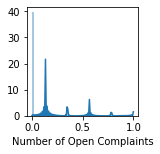

column >> Number of Policies


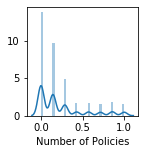

In [14]:
# to ensure all features are within the same range, we need to apply MinMaxScaler transformation

display(data_nna_num_no.max())
display(data_nna_num_no.min())

x = data_nna_num_no.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_nna_num_no_sc = pd.DataFrame(x_scaled)
data_nna_num_no_sc.columns = data_nna_num_no.columns
display(data_nna_num_no_sc)

display(data_nna_num_no_sc.max())
display(data_nna_num_no_sc.min())
display(data_nna_num_no_sc.isna().sum())

for col in cols:
    print("column >>",col)
    fig,ax = plt.subplots(figsize=(2,2))
    ax= sns.distplot(data_nna_num_no_sc[col])
    plt.show()


#### Both Monthly premium Auto and Open Complaints are not within the Skewness range and will need to be transformed
#### In addition, the normalizer I have used nullifies the values of the columns where we had put the Mean!!! so be very careful. We need to put back the mean now that the values are scaled before calculating the log transform.


,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.514064,0.033755,0.911765,0.040816,0.066396,0.239750
1,0.307084,0.139241,0.352941,0.418367,0.066396,1.000000
2,0.430601,0.198312,0.500000,0.377551,0.066396,0.142857
3,0.307084,0.189873,0.500000,0.653061,0.066396,0.857143
4,0.375778,0.050633,0.323529,0.438776,0.066396,0.239750


column >> Income


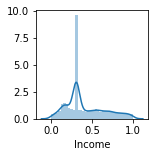

column >> Monthly Premium Auto


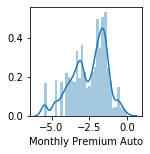

column >> Months Since Last Claim


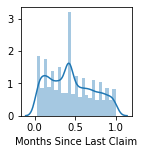

column >> Months Since Policy Inception


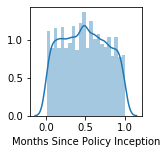

column >> Number of Open Complaints


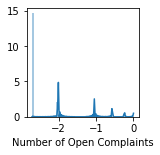

column >> Number of Policies


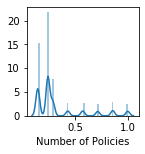

In [15]:
#log transform from columns MPA and OCs 

data_nna_num_no_sc=data_nna_num_no_sc.mask(data_nna_num_no_sc==0).fillna(data_nna_num_no_sc.mean())
display(data_nna_num_no_sc.head())
data_nna_num_no_sc["Monthly Premium Auto"]=np.log(data_nna_num_no_sc["Monthly Premium Auto"])
data_nna_num_no_sc["Number of Open Complaints"]=np.log(data_nna_num_no_sc["Number of Open Complaints"])

for col in cols:
    print("column >>",col)
    fig,ax = plt.subplots(figsize=(2,2))
    ax= sns.distplot(data_nna_num_no_sc[col])
    plt.show()


In [16]:
# Normalization - all columns.
transformer = Normalizer().fit(data_nna_num_no_sc)
data_nna_num_no_sc_norm = pd.DataFrame(transformer.transform(data_nna_num_no_sc))
type(data_nna_num_no_sc_norm)
data_nna_num_no_sc_norm.columns= data_nna_num_no_sc.columns
display(data_nna_num_no_sc_norm)
data_nna_num_no_sc_norm.apply(skew)


,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.114968,-0.757850,0.203912,0.009128,-0.606553,0.053619
1,0.086386,-0.554620,0.099286,0.117691,-0.762948,0.281311
2,0.132436,-0.497606,0.153780,0.116120,-0.834138,0.043937
3,0.090080,-0.487356,0.146671,0.191570,-0.795574,0.251435
4,0.091815,-0.728886,0.079049,0.107208,-0.662662,0.058579
...,...,...,...,...,...,...
8713,0.163107,-0.706972,0.118494,0.212806,-0.642739,0.033855
8714,0.034013,-0.681743,0.101124,0.072867,-0.717296,0.063409
8715,0.126729,-0.945049,0.097102,0.151598,-0.234382,0.058955
8716,0.038118,-0.550877,0.279537,0.005878,-0.781111,0.082288


Income                           1.282684
Monthly Premium Auto             0.525873
Months Since Last Claim          0.924930
Months Since Policy Inception    0.737556
Number of Open Complaints        1.112189
Number of Policies               2.181305
dtype: float64

(8718, 6)
column >> Income


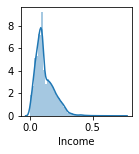

column >> Monthly Premium Auto


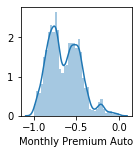

column >> Months Since Last Claim


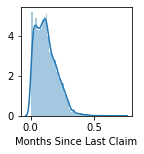

column >> Months Since Policy Inception


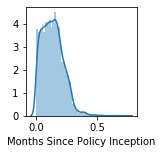

column >> Number of Open Complaints


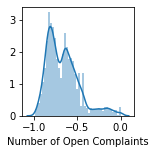

column >> Number of Policies


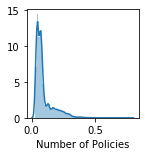

In [17]:
# Show distributions after the transformation

print(data_nna_num_no_sc_norm.shape)

for col in cols:
    print("column >>",col)
    fig,ax = plt.subplots(figsize=(2,2))
    ax= sns.distplot(data_nna_num_no_sc_norm[col])
    plt.show()

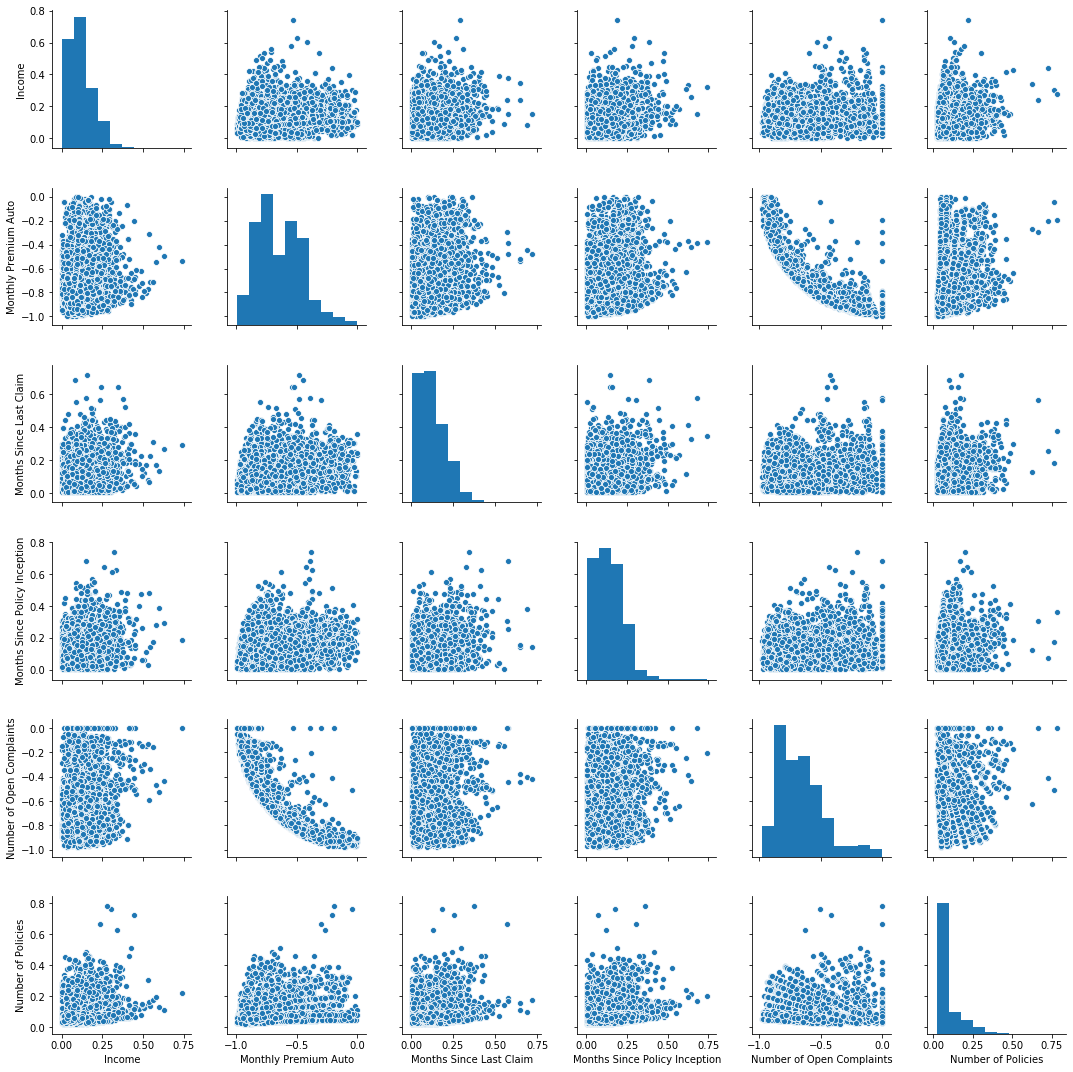

In [18]:
# Pairplot
sns.pairplot(data_nna_num_no_sc_norm)
plt.show()


In [19]:
# Categorical data wrangling
# OneHot encoding
display(data_nna_cat)

data_nna_cat_oh= pd.DataFrame()

data_nna_cat_dc = data_nna_cat.drop(["Customer","Effective To Date"], axis = 1)
display(data_nna_cat_dc)

data_nna_cat_oh = pd.get_dummies(data_nna_cat_dc)

display(data_nna_cat_oh)


,Customer,State,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


,State,Response,Coverage,Education,Employment Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,1,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
9130,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9131,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9132,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [20]:
#concatenate dataframes
data_nna_num_no_sc_norm_ri = data_nna_num_no_sc_norm.reset_index()
data_nna_cat_oh_ri = data_nna_cat_oh.reset_index()
data_nna_cat_oh_ri = data_nna_cat_oh_ri.drop("index", axis = 1)
display(data_nna_cat_oh_ri)

data_nna_dn_ri = data_nna_dn.reset_index()
data_nna_dn_ri = data_nna_dn_ri.drop("index", axis = 1)
display(data_nna_dn_ri)

data_nna_indep = pd.concat([data_nna_num_no_sc_norm_ri,data_nna_cat_oh_ri], axis=1)
data_nna_indep.drop("index", axis=1, inplace=True)
display(data_nna_indep)



,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8713,0,1,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
8714,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
8715,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
8716,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


,Total Claim Amount
0,384.811147
1,1131.464935
2,566.472247
3,529.881344
4,138.130879
...,...
8713,198.234764
8714,379.200000
8715,790.784983
8716,691.200000


,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State_Arizona,State_California,State_Nevada,State_Oregon,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0.114968,-0.757850,0.203912,0.009128,-0.606553,0.053619,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.086386,-0.554620,0.099286,0.117691,-0.762948,0.281311,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.132436,-0.497606,0.153780,0.116120,-0.834138,0.043937,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0.090080,-0.487356,0.146671,0.191570,-0.795574,0.251435,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.091815,-0.728886,0.079049,0.107208,-0.662662,0.058579,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8713,0.163107,-0.706972,0.118494,0.212806,-0.642739,0.033855,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
8714,0.034013,-0.681743,0.101124,0.072867,-0.717296,0.063409,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
8715,0.126729,-0.945049,0.097102,0.151598,-0.234382,0.058955,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
8716,0.038118,-0.550877,0.279537,0.005878,-0.781111,0.082288,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [21]:
Y = data_nna_dn_ri["Total Claim Amount"]

X = data_nna_indep
#X = data_nna_num_no_sc_norm_ri

#train split
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=15)

X_train.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State_Arizona,State_California,State_Nevada,State_Oregon,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
7954,0.028663,-0.818975,0.047210,0.163790,-0.544165,0.057326,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4689,0.185286,-0.626417,0.144817,0.019539,-0.741882,0.039078,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4258,0.102815,-0.838854,0.005647,0.107745,-0.520676,0.054852,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1367,0.297122,-0.647162,0.351579,0.168890,-0.482621,0.328398,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
6745,0.061526,-0.742940,0.090162,0.222094,-0.617574,0.073496,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


### 05 - Modeling

    Apply model.


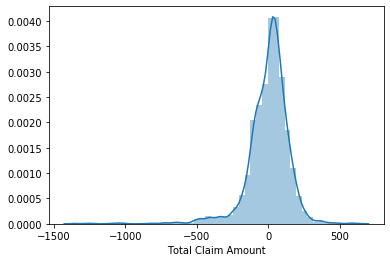

In [22]:
model = LinearRegression()
lm = model.fit(X_train,Y_train)
predictions = lm.predict(X_test)
residuals = predictions - Y_test
sns.distplot(residuals)

### 06 - Model Validation

    R2.
    MSE.
    RMSE.
    MAE.


In [23]:
MAE = mean_absolute_error(Y_test, predictions)
MSE = mean_squared_error(Y_test, predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(Y_test, predictions)

print("MAE of the linear model on test set: %5.3f"%(MAE))
print("MSE of the linear model on test set: %5.3f"%(MSE))
print("RMSE of the linear model on test set: %5.3f"%(RMSE))
print("R2 of the linear model on test set: %5.3f"%(R2))

MAE of the linear model on test set: 99.608
MSE of the linear model on test set: 21972.571
RMSE of the linear model on test set: 148.231
R2 of the linear model on test set: 0.760


### 07 - Reporting

    Present results.


### For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise. Some approaches you can try in this exercise:

    use the concept of multicollinearity and remove insignificant variables
    use a different method of scaling the numerical variables
    use a different ratio of train test split
    use the transformation on numerical columns which align it more towards a normal distribution


,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,56274.000000,69,32.0,5.0,0.384388,1
1,37657.380009,94,13.0,42.0,0.384388,8
2,48767.000000,108,18.0,38.0,0.384388,2
3,37657.380009,106,18.0,65.0,0.384388,7
4,43836.000000,73,12.0,44.0,0.384388,1
...,...,...,...,...,...,...
9129,71941.000000,73,18.0,89.0,0.384388,2
9130,21604.000000,79,14.0,28.0,0.384388,1
9131,37657.380009,85,9.0,37.0,3.000000,2
9132,21941.000000,96,34.0,3.0,0.384388,3


,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,56274.000000,69,32.0,5.0,0.384388,1
1,37657.380009,94,13.0,42.0,0.384388,8
2,48767.000000,108,18.0,38.0,0.384388,2
3,37657.380009,106,18.0,65.0,0.384388,7
4,43836.000000,73,12.0,44.0,0.384388,1
...,...,...,...,...,...,...
9129,71941.000000,73,18.0,89.0,0.384388,2
9130,21604.000000,79,14.0,28.0,0.384388,1
9131,37657.380009,85,9.0,37.0,3.000000,2
9132,21941.000000,96,34.0,3.0,0.384388,3


,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.664796,-0.341463,1.0625,-0.916268,0.000000,-0.5
1,0.000000,0.268293,-0.1250,-0.129034,0.000000,3.0
2,0.396723,0.609756,0.1875,-0.214140,0.000000,0.0
3,0.000000,0.560976,0.1875,0.360328,0.000000,2.5
4,0.220637,-0.243902,-0.1875,-0.086481,0.000000,-0.5
...,...,...,...,...,...,...
8713,1.224262,-0.243902,0.1875,0.870966,0.000000,0.0
8714,-0.573263,-0.097561,-0.0625,-0.426906,0.000000,-0.5
8715,0.000000,0.048780,-0.3750,-0.235417,2.615612,0.0
8716,-0.561229,0.317073,1.1875,-0.958821,0.000000,0.5


Scaled max, min for whole dataframe


Income                           2.225565
Monthly Premium Auto             5.243902
Months Since Last Claim          1.250000
Months Since Policy Inception    1.083732
Number of Open Complaints        4.615612
Number of Policies               3.000000
dtype: float64

Income                          -0.986319
Monthly Premium Auto            -0.536585
Months Since Last Claim         -0.875000
Months Since Policy Inception   -1.001374
Number of Open Complaints        0.000000
Number of Policies              -0.500000
dtype: float64

Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
dtype: int64

column >> Income


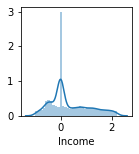

column >> Monthly Premium Auto


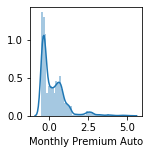

column >> Months Since Last Claim


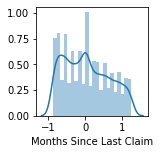

column >> Months Since Policy Inception


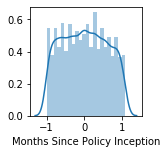

column >> Number of Open Complaints


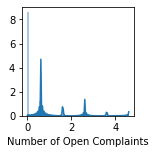

column >> Number of Policies


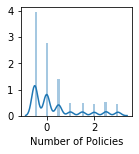

Dataframe before changing 0 values to the mean


,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.664796,-0.341463,1.0625,-0.916268,0.0,-0.5
1,0.000000,0.268293,-0.1250,-0.129034,0.0,3.0
2,0.396723,0.609756,0.1875,-0.214140,0.0,0.0
3,0.000000,0.560976,0.1875,0.360328,0.0,2.5
4,0.220637,-0.243902,-0.1875,-0.086481,0.0,-0.5


Number of zero values: Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
dtype: int64
Dataframe after changing 0 values to the mean


,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.664796,-0.341463,1.0625,-0.916268,0.30646,-0.500000
1,0.342436,0.268293,-0.1250,-0.129034,0.30646,3.000000
2,0.396723,0.609756,0.1875,-0.214140,0.30646,0.339126
3,0.342436,0.560976,0.1875,0.360328,0.30646,2.500000
4,0.220637,-0.243902,-0.1875,-0.086481,0.30646,-0.500000


Number of zero values: Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
dtype: int64
########################


5.2439024390243905

-0.5365853658536586

4.615611999124152

0.30645987731390745

########################
column >> Monthly Premium Auto


C:\Users\Borja\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: cannot convert float NaN to integer

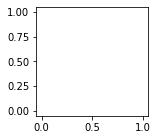

In [44]:
# scaler initially MinMaxScaler() => now:Robustscaler
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
display(data_nna_num_no)
x = data_nna_num_no.values #returns a numpy array
robustscaler = RobustScaler
x_scaled = robustscaler(quantile_range=(25, 75)).fit_transform(x)
data_nna_num_no_sc = pd.DataFrame(x_scaled)
data_nna_num_no_sc.columns = data_nna_num_no.columns
display(data_nna_num_no)
display(data_nna_num_no_sc)
print("Scaled max, min for whole dataframe")
display(data_nna_num_no_sc.max())
display(data_nna_num_no_sc.min())
display(data_nna_num_no_sc.isna().sum())

for col in cols:
    print("column >>",col)
    fig,ax = plt.subplots(figsize=(2,2))
    ax= sns.distplot(data_nna_num_no_sc[col])
    plt.show()

########################################################    
#log transform from columns MPA and OCs 
print("Dataframe before changing 0 values to the mean")
display(data_nna_num_no_sc.head())
print("Number of zero values:", pd.isnull(data_nna_num_no_sc).sum())
data_nna_num_no_sc=data_nna_num_no_sc.mask(data_nna_num_no_sc==0).fillna(data_nna_num_no_sc.mean())
print("Dataframe after changing 0 values to the mean")
display(data_nna_num_no_sc.head())
print("Number of zero values:", pd.isnull(data_nna_num_no_sc).sum())
print("########################")
display(data_nna_num_no_sc["Monthly Premium Auto"].max())
display(data_nna_num_no_sc["Monthly Premium Auto"].min())

display(data_nna_num_no_sc["Number of Open Complaints"].max())
display(data_nna_num_no_sc["Number of Open Complaints"].min())

data_nna_num_no_sc["Monthly Premium Auto"]=np.log(data_nna_num_no_sc["Monthly Premium Auto"])
data_nna_num_no_sc["Number of Open Complaints"]=np.log(data_nna_num_no_sc["Number of Open Complaints"])

print("########################")
print("column >> Monthly Premium Auto")
fig,ax = plt.subplots(figsize=(2,2))
ax= sns.distplot(data_nna_num_no_sc["Monthly Premium Auto"])
plt.show()   
print("########################")
print("column >> Number of Open Complaints")
fig,ax = plt.subplots(figsize=(2,2))
ax= sns.distplot(data_nna_num_no_sc["Number of Open Complaints"])
plt.show()   
    
########################################
    
######################
# Normalization - all columns.
transformer = Normalizer().fit(data_nna_num_no_sc)
data_nna_num_no_sc_norm = pd.DataFrame(transformer.transform(data_nna_num_no_sc))
type(data_nna_num_no_sc_norm)
data_nna_num_no_sc_norm.columns= data_nna_num_no_sc.columns
display(data_nna_num_no_sc_norm)
data_nna_num_no_sc_norm.apply(skew)
print("########################")
print("Normalized distributions")
print("########################")

for col in cols:
    print("column >>",col)
    fig,ax = plt.subplots(figsize=(2,2))
    ax= sns.distplot(data_nna_num_no_sc_norm[col])
    plt.show()

#################
# No change for Cat columns 
################

# Concatenate updated num dataframe with existing Cat dataframe
################

data_nna_num_no_sc_norm_ri = data_nna_num_no_sc_norm.reset_index()
data_nna_cat_oh_ri = data_nna_cat_oh.reset_index()
data_nna_cat_oh_ri = data_nna_cat_oh_ri.drop("index", axis = 1)
display(data_nna_cat_oh_ri)

data_nna_dn_ri = data_nna_dn.reset_index()
data_nna_dn_ri = data_nna_dn_ri.drop("index", axis = 1)
display(data_nna_dn_ri)

data_nna_indep = pd.concat([data_nna_num_no_sc_norm_ri,data_nna_cat_oh_ri], axis=1)
data_nna_indep.drop("index", axis=1, inplace=True)
display(data_nna_indep)


#########################
# X Y split
#########################

Y = data_nna_dn_ri["Total Claim Amount"]

X = data_nna_indep


#train split
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=15)

X_train.head()

#########################
# Apply model
#########################
model = LinearRegression()
lm = model.fit(X_train,Y_train)
predictions = lm.predict(X_test)
residuals = predictions - Y_test
sns.distplot(residuals)

#########################
# Calculate error and closeness to real results
#########################

MAE = mean_absolute_error(Y_test, predictions)
MSE = mean_squared_error(Y_test, predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(Y_test, predictions)

print("MAE of the linear model on test set: %5.3f"%(MAE))
print("MSE of the linear model on test set: %5.3f"%(MSE))
print("RMSE of the linear model on test set: %5.3f"%(RMSE))
print("R2 of the linear model on test set: %5.3f"%(R2))
